**WPI-Forecasting-Models**

In [12]:
pip install pandas numpy matplotlib statsmodels seaborn


**Checking: Trend, Seasonality, ACF and PACF**

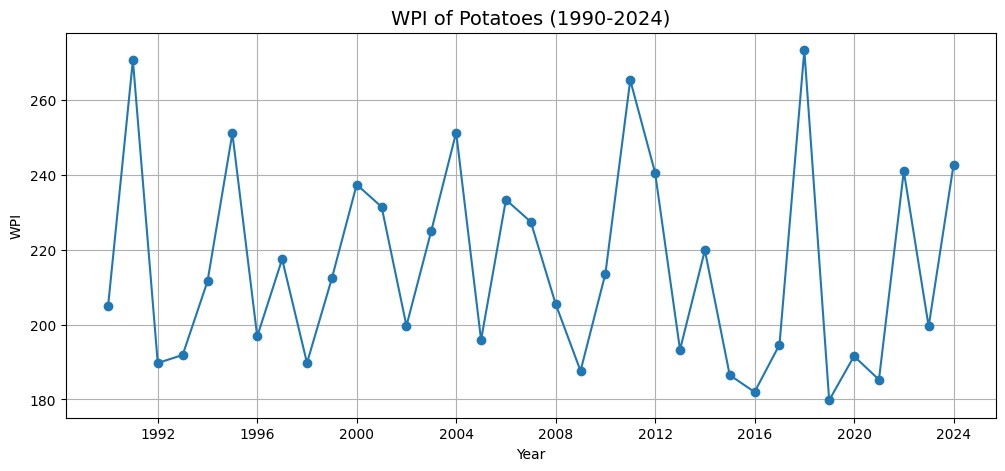

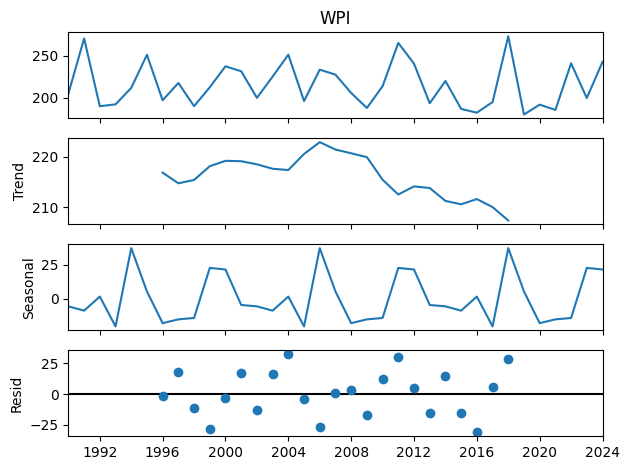

ADF Test Results:
ADF Statistic: -6.54927258778765
p-value: 8.935530000413682e-09
Data is Stationary


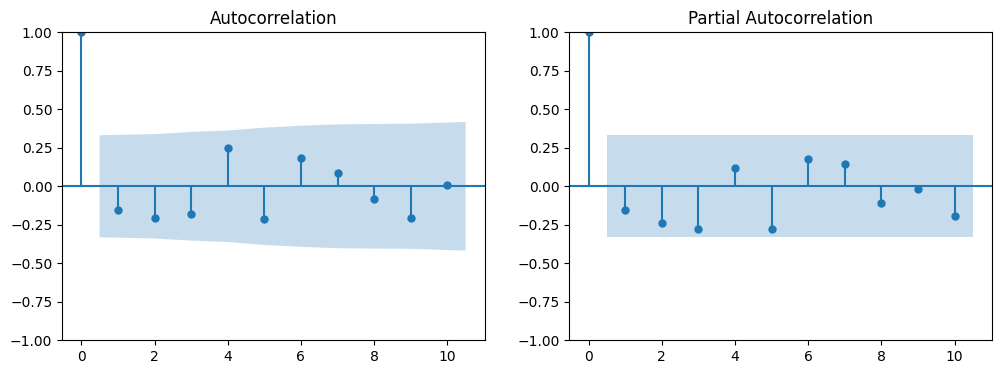

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load the WPI dataset
file_path = r"C:\Users\ishva\Downloads\$\WPI.xlsx"
df = pd.read_excel(file_path)

# Convert 'Year' to datetime format and set as index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 5))
plt.plot(df, marker='o', linestyle='-')
plt.title("WPI of Potatoes (1990-2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("WPI")
plt.grid()
plt.show()  

# Decompose the time series to check trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(df['WPI'], model='additive', period=12)
decomposition.plot()
plt.show()

# Perform Augmented Dickey-Fuller Test (ADF) for Stationarity Check
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Data is Stationary" if result[1] < 0.05 else "Non-Stationary")

adf_test(df['WPI'])

# Determine the maximum allowable lags (50% of data length)
max_lags = len(df) // 2
# ACF and PACF plots to determine ARIMA parameters
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df['WPI'], lags=10, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['WPI'], lags=10, ax=axes[1])
plt.show()



**Models: ARMA, ARIMA, SRIMA, Holts-Winters**

C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARMA Train MAPE: 8.69% | MSE: 511.16 | RMSE: 22.61
ARMA Test MAPE: 15.43% | MSE: 1146.88 | RMSE: 33.87


C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA Train MAPE: 8.69% | MSE: 511.16 | RMSE: 22.61
ARIMA Test MAPE: 15.43% | MSE: 1146.88 | RMSE: 33.87


C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA Train MAPE: 13.81% | MSE: 2255.02 | RMSE: 47.49
SARIMA Test MAPE: 14.11% | MSE: 1134.14 | RMSE: 33.68
Holt-Winters Train MAPE: 7.01% | MSE: 347.00 | RMSE: 18.63
Holt-Winters Test MAPE: 13.71% | MSE: 1364.11 | RMSE: 36.93

Model Performance Comparison:
          Model  Train MAPE  Test MAPE
3  Holt-Winters    7.011914  13.708543
2        SARIMA   13.814188  14.108994
0          ARMA    8.693218  15.428208
1         ARIMA    8.693218  15.428208


C:\Users\ishva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)



Forecasted WPI Values for Next 12 Years:
                  ARMA       ARIMA      SARIMA  Holt-Winters
2025-12-31  239.166642  239.166642  213.409018    214.292636
2026-12-31  236.099784  236.099784  216.424855    231.147639
2027-12-31  223.771795  223.771795  212.197479    193.058263
2028-12-31  219.390935  219.390935  213.674871    194.436974
2029-12-31  217.834158  217.834158  211.717242    193.566130
2030-12-31  217.280944  217.280944  213.713330    230.666762
2031-12-31  217.084354  217.084354  215.490506    230.834381
2032-12-31  217.014494  217.014494  214.791614    204.245632
2033-12-31  216.989669  216.989669  211.669742    197.353143
2034-12-31  216.980847  216.980847  218.560485    216.553619
2035-12-31  216.977712  216.977712  214.451780    196.832969
2036-12-31  216.976598  216.976598  210.431324    183.389488


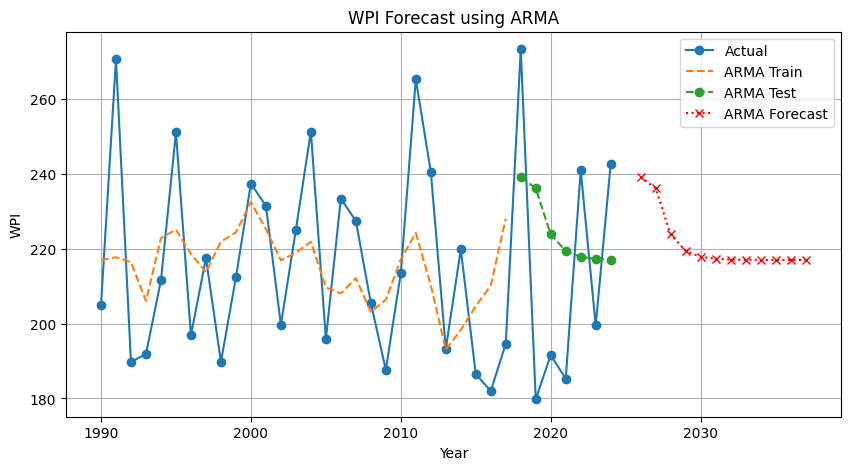

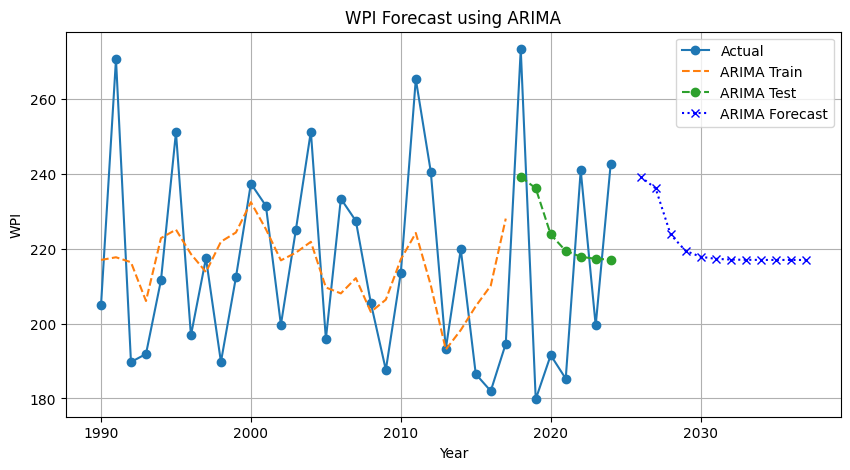

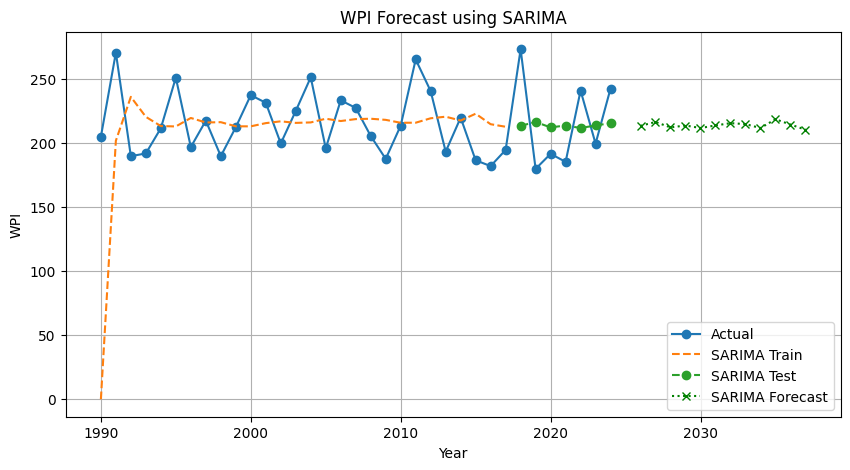

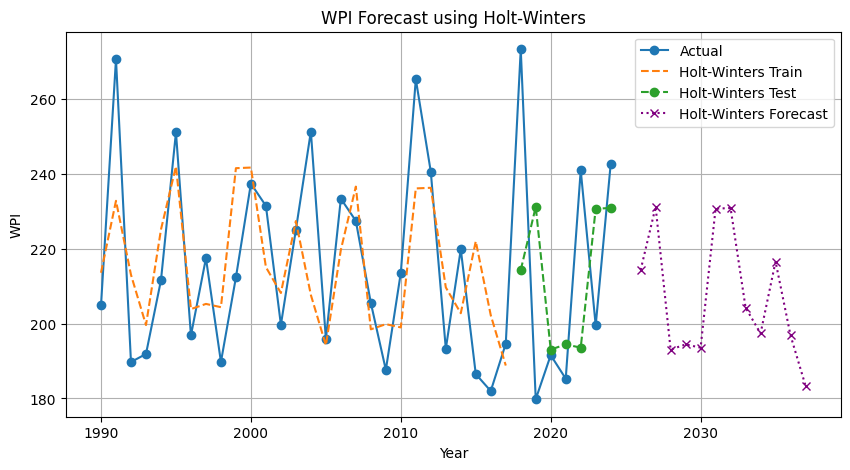

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as MSE

# Load the WPI dataset
file_path = r"C:\Users\ishva\Downloads\$\WPI.xlsx"
df = pd.read_excel(file_path, parse_dates=["Year"], index_col="Year")

# Split data into Train and Test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name, data_type):
    mape = MAPE(y_true, y_pred) * 100
    mse = MSE(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} {data_type} MAPE: {mape:.2f}% | MSE: {mse:.2f} | RMSE: {rmse:.2f}")
    return mape, mse, rmse

# ---- ARMA Model ----
arma_model = ARIMA(train, order=(1, 0, 2))
arma_result = arma_model.fit()
arma_train_pred = arma_result.fittedvalues
arma_test_pred = arma_result.forecast(steps=len(test))
arma_train_mape, arma_train_mse, arma_train_rmse = evaluate_model(train, arma_train_pred, "ARMA", "Train")
arma_test_mape, arma_test_mse, arma_test_rmse = evaluate_model(test, arma_test_pred, "ARMA", "Test")

# ---- ARIMA Model ----
arima_model = ARIMA(train['WPI'], order=(1, 0, 2))
arima_result = arima_model.fit()
arima_train_pred = arima_result.fittedvalues
arima_test_pred = arima_result.forecast(steps=len(test))
arima_train_mape, _, _ = evaluate_model(train['WPI'], arima_train_pred, "ARIMA", "Train")
arima_test_mape, _, _ = evaluate_model(test['WPI'], arima_test_pred, "ARIMA", "Test")

# ---- SARIMA Model ----
sarima_model = SARIMAX(train['WPI'], order=(1, 0, 2), seasonal_order=(1, 0, 2, 12))
sarima_result = sarima_model.fit()
sarima_train_pred = sarima_result.fittedvalues
sarima_test_pred = sarima_result.forecast(steps=len(test))
sarima_train_mape, _, _ = evaluate_model(train['WPI'], sarima_train_pred, "SARIMA", "Train")
sarima_test_mape, _, _ = evaluate_model(test['WPI'], sarima_test_pred, "SARIMA", "Test")

# ---- Holt-Winters (Exponential Smoothing) ----
hw_model = ExponentialSmoothing(train['WPI'], trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_train_pred = hw_result.fittedvalues
hw_test_pred = hw_result.forecast(steps=len(test))
hw_train_mape, _, _ = evaluate_model(train['WPI'], hw_train_pred, "Holt-Winters", "Train")
hw_test_mape, _, _ = evaluate_model(test['WPI'], hw_test_pred, "Holt-Winters", "Test")

# ---- Model Comparison ----
model_comparison = pd.DataFrame({
    'Model': ['ARMA', 'ARIMA', 'SARIMA', 'Holt-Winters'],
    'Train MAPE': [arma_train_mape, arima_train_mape, sarima_train_mape, hw_train_mape],
    'Test MAPE': [arma_test_mape, arima_test_mape, sarima_test_mape, hw_test_mape]
}).sort_values(by='Test MAPE')
print("\nModel Performance Comparison:")
print(model_comparison)

# ---- Forecast the Next 12 Years ----
n_forecast = 12
future_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=n_forecast, freq="YE")
arima_future = arima_result.forecast(steps=n_forecast)
sarima_future = sarima_result.forecast(steps=n_forecast)
hw_future = hw_result.forecast(steps=n_forecast)
arma_future = arma_result.forecast(steps=n_forecast)

forecast_df = pd.DataFrame({
    'ARMA': arma_future.values,
    'ARIMA': arima_future.values,
    'SARIMA': sarima_future.values,
    'Holt-Winters': hw_future.values
}, index=future_years)
print("\nForecasted WPI Values for Next 12 Years:")
print(forecast_df)

# ---- Plot Forecasts ----
def plot_forecast(model_name, actual, train_pred, test_pred, future_pred, color):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['WPI'], label="Actual", marker='o', linestyle="-")
    plt.plot(train.index, train_pred, label=f"{model_name} Train", linestyle="--")
    plt.plot(test.index, test_pred, label=f"{model_name} Test", linestyle="--", marker="o")
    plt.plot(future_years, future_pred, label=f"{model_name} Forecast", linestyle="dotted", marker="x", color=color)
    plt.title(f"WPI Forecast using {model_name}")
    plt.xlabel("Year")
    plt.ylabel("WPI")
    plt.legend()
    plt.grid()
    plt.show()

plot_forecast("ARMA", df, arma_train_pred, arma_test_pred, arma_future, "red")
plot_forecast("ARIMA", df, arima_train_pred, arima_test_pred, arima_future, "blue")
plot_forecast("SARIMA", df, sarima_train_pred, sarima_test_pred, sarima_future, "green")
plot_forecast("Holt-Winters", df, hw_train_pred, hw_test_pred, hw_future, "purple")


**SVR**

SVR Train MAPE: 9.01% | MSE: 595.82 | RMSE: 24.41
SVR Test MAPE: 13.47% | MSE: 1135.30 | RMSE: 33.69

Forecasted WPI Values for Next 12 Years:
    Year  SVR Forecast
0   2025    210.770415
1   2026    210.930361
2   2027    211.067342
3   2028    211.179162
4   2029    211.266505
5   2030    211.331968
6   2031    211.379140
7   2032    211.411870
8   2033    211.433763
9   2034    211.447894
10  2035    211.456701
11  2036    211.462004


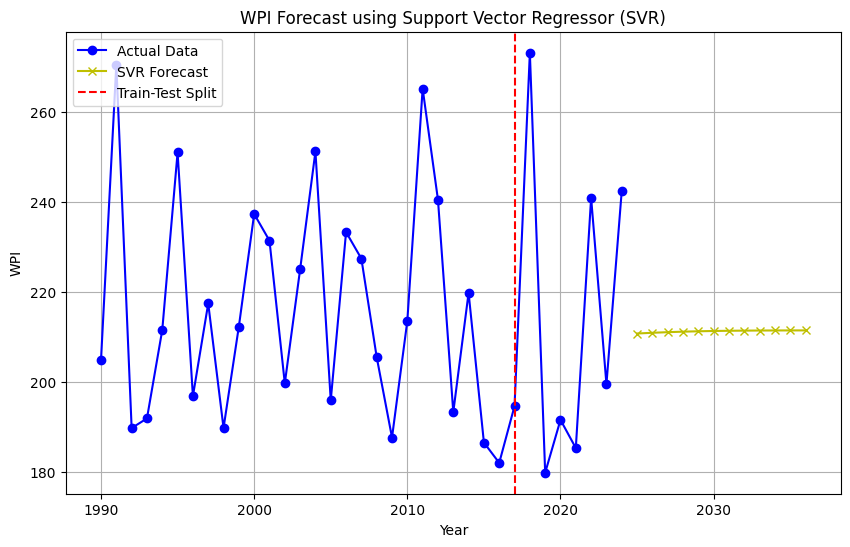

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as MSE
import warnings
warnings.filterwarnings('ignore')

# Load the WPI dataset
file_path = r"C:\Users\ishva\Downloads\$\WPI.xlsx"
data = pd.read_excel(file_path)
data.set_index('Year', inplace=True)

# Split data into Train and Test
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Features and Target
X_train, y_train = train.index.values.reshape(-1, 1), train['WPI']
X_test, y_test = test.index.values.reshape(-1, 1), test['WPI']

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name, data_type):
    mape = MAPE(y_true, y_pred) * 100
    mse = MSE(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} {data_type} MAPE: {mape:.2f}% | MSE: {mse:.2f} | RMSE: {rmse:.2f}")
    return mape, mse, rmse

# ---- Support Vector Regressor (SVR) ----
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_train_pred = svr_model.predict(X_train)
svr_test_pred = svr_model.predict(X_test)
evaluate_model(y_train, svr_train_pred, "SVR", "Train")
evaluate_model(y_test, svr_test_pred, "SVR", "Test")

# Forecasting the Next 12 Years
future_years = np.arange(data.index[-1] + 1, data.index[-1] + 13).reshape(-1, 1)
svr_future = svr_model.predict(future_years)

forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'SVR Forecast': svr_future
})
print("\nForecasted WPI Values for Next 12 Years:")
print(forecast_df)

# Plotting Forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['WPI'], marker='o', label='Actual Data', color='blue')
plt.plot(future_years, svr_future, 'yx-', label='SVR Forecast')

# Highlight Training and Testing Periods
plt.axvline(x=train.index[-1], color='red', linestyle='--', label='Train-Test Split')

plt.xlabel('Year')
plt.ylabel('WPI')
plt.title('WPI Forecast using Support Vector Regressor (SVR)')
plt.legend(['Actual Data', 'SVR Forecast', 'Train-Test Split'], loc='upper left')
plt.grid(True)
plt.show()
